In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import re
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from nltk.stem import WordNetLemmatizer

nlp = en_core_web_sm.load()

C:\Users\YL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Files size too big, takes too long to run, hence we shorten the row first
df1 = df.iloc[1:100]
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux


C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

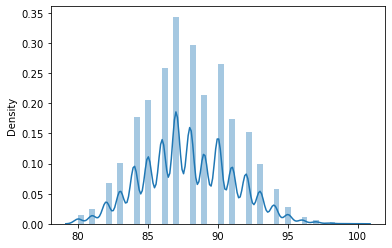

In [5]:
sns.distplot(df,x=df['points'])

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

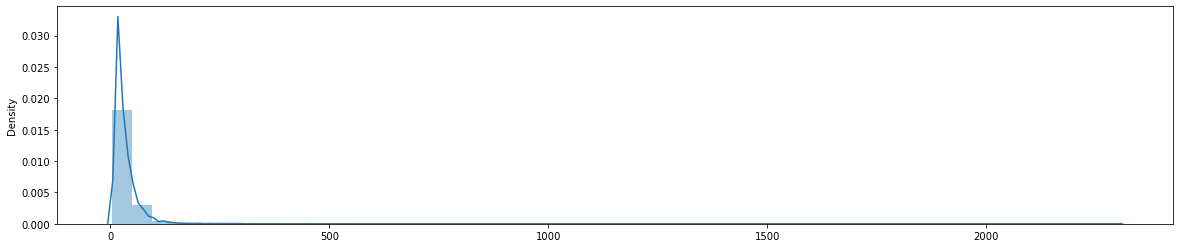

In [6]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df,x=df['price'],ax=ax)

In [7]:
df['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='country'>

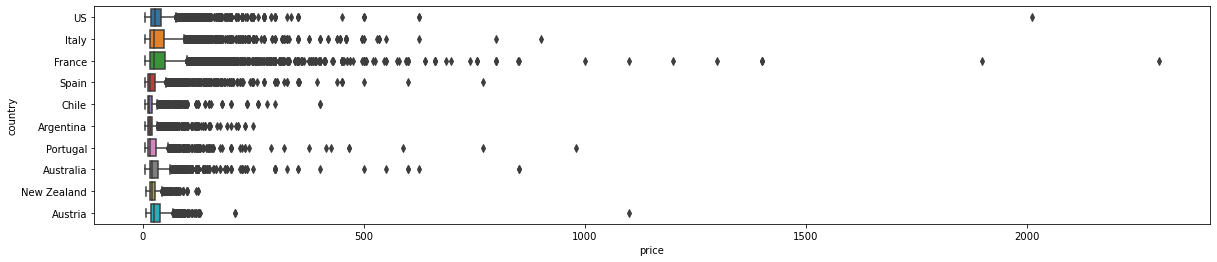

In [8]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='country',data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

In [9]:
def cat(x):
    if  x < 85 :
        return "1"
    if x < 90 and x >= 85:
        return "2"
    if x < 95 and x>= 90:
      return "3"
    if x>=95:
      return "4"


df['category'] = df['points'].apply(lambda x: cat(x))

<AxesSubplot:xlabel='price', ylabel='category'>

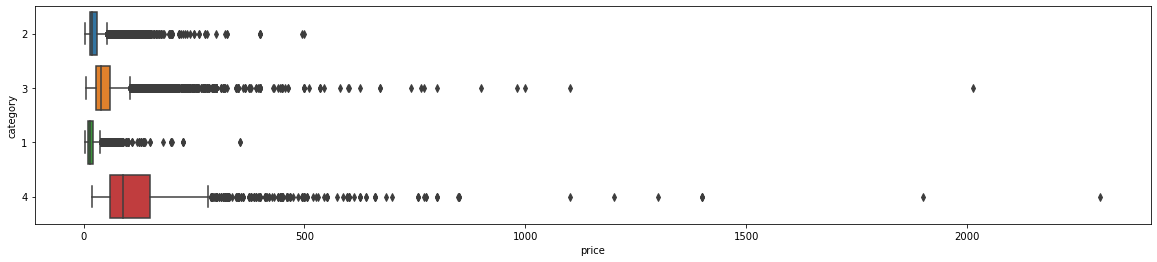

In [10]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='category',data=df,order=df.category.value_counts().iloc[:10].index,ax=ax)

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

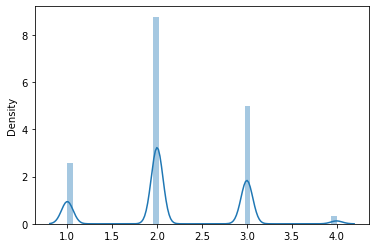

In [11]:
sns.distplot(df,x=df['category'])

In [12]:
words=[]
for i in df['description']:
    new_text=i.split(" ")
    for i in new_text:
        words.append(i)


In [13]:
from nltk import FreqDist

count_words=FreqDist(words)

In [14]:
count_words

FreqDist({'and': 403887, 'the': 202916, 'a': 185678, 'of': 183978, 'with': 147472, 'is': 110637, 'this': 71326, 'in': 71049, 'to': 63669, 'wine': 60460, ...})

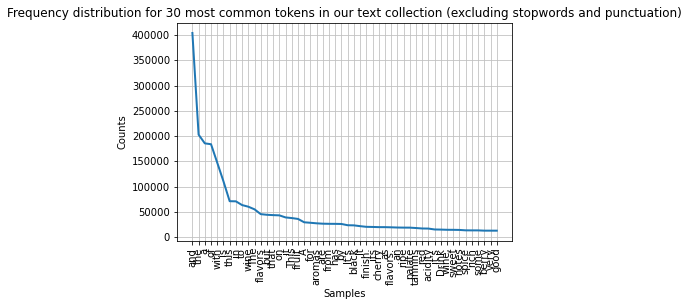

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
count_words.plot(50,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [16]:
df['description'].describe()

count                                                150930
unique                                                97821
top       A little bit funky and unsettled when you pop ...
freq                                                      6
Name: description, dtype: object

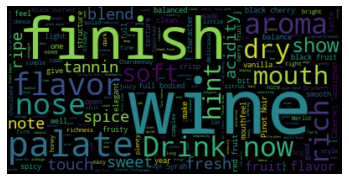

In [17]:
from wordcloud import WordCloud

text = " ".join(review for review in df.description)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='country', ylabel='count'>

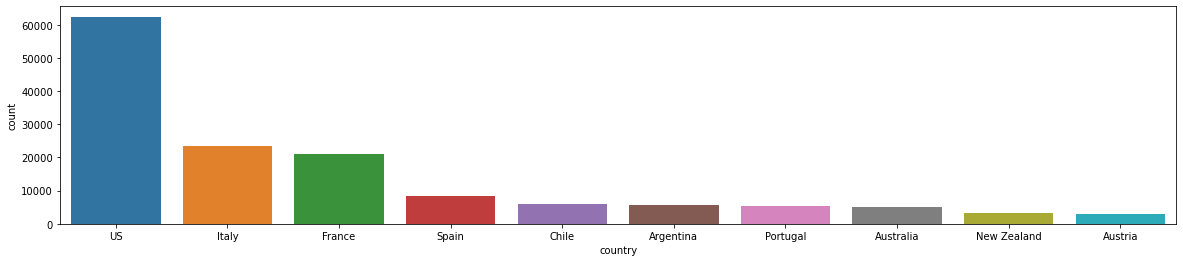

In [18]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="country", data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

<AxesSubplot:xlabel='variety', ylabel='count'>

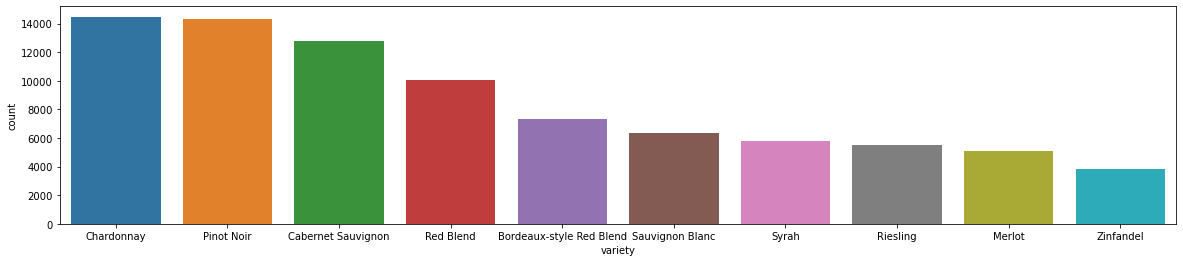

In [19]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="variety", data=df,order=df.variety.value_counts().iloc[:10].index,ax=ax)

In [20]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(comment):
    comment = re.sub("@[A-Za-z0-9]+","",comment) #Remove @ sign
    comment = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", comment) #Remove http links
    comment = re.sub(r'[^\w\s]','',comment)
    comment = comment.lower()
    comment = re.sub(r'\d+', '',comment) #remove numbers
    comment = " ".join(comment.split())
    comment = ''.join(c for c in comment if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    comment = comment.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) 
         if w.lower() in words or not w.isalpha())
    return comment
df1['processed_description'] = df1['description'].map(lambda x: cleaner(x))


[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
#Lemmatize Words

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df1['lemmatised_content'] = df1['processed_description'].apply(lambda x: lemmatizer(x))
df1['lemmatised_content']=df1['lemmatised_content'].str.replace('-PRON-', '')
tokenizer = RegexpTokenizer(r'\w+')

#tokenize the words 

df1['stemming_content'] = df1['lemmatised_content']

#remove stop words

#def remove_stopwords(text):
#    words = [w for w in text if w not in stopwords.words('english')]
#    custom_words_rm = ['']
#    final_words = [w for w in words if w not in custom_words_rm]
#    return final_words

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [22]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this is a smooth soft wine that is full of bla...,this be a smooth soft wine that be full of bla...,this be a smooth soft wine that be full of bla...
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this is an easygoing wine thats neither too oa...,this be an easygoing wine that s neither too o...,this be an easygoing wine that s neither too o...
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blended with small of cabernet franc petit and...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,closer to than is this is with a cooler visage...,close to than be this be with a cooler visage ...,close to than be this be with a cooler visage ...


In [23]:
# Add our own words
#from nltk.corpus import words
#manywords = words.words()
#new_words = manywords

#remove words with length less than 3 & urls (Can remove if we dont have good explanation about this)
#def remove_shortwords(text, new_words):
#    words = [w for w in text if len(w)>=3]
#   words = [w for w in text if w in new_words]
#    return words

#df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_stopwords(x))
#df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_shortwords(x, new_words))
#df1['remove_stopwords_content'].head().values

In [24]:
#def join(text):
#    sentence = " ".join(text)
#    return sentence
#df1['final_content'] = df1['remove_stopwords_content'].apply(lambda x: join(x))

In [25]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df1['final_content'] = df1['stemming_content'].apply(stem_sentences)

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content,final_content
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this is a smooth soft wine that is full of bla...,this be a smooth soft wine that be full of bla...,this be a smooth soft wine that be full of bla...,thi be a smooth soft wine that be full of blac...
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this is an easygoing wine thats neither too oa...,this be an easygoing wine that s neither too o...,this be an easygoing wine that s neither too o...,thi be an easygo wine that s neither too oaki ...
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blended with small of cabernet franc petit and...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,closer to than is this is with a cooler visage...,close to than be this be with a cooler visage ...,close to than be this be with a cooler visage ...,close to than be thi be with a cooler visag sp...


In [27]:
#df1.to_csv('demo3.csv')

## Do a count frequency for each word (after) to show what is left

In [28]:
print ("i havent do!")

i havent do!


## Text Analysis using Flair

In [29]:
import flair
from flair.models import TextClassifier
from segtok.segmenter import split_single
from flair.data import Sentence

def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

In [30]:
classifier = TextClassifier.load('en-sentiment')

df1['sentences'] = df1.final_content.apply(make_sentences)
df1['flair_scores'] = df1.sentences.apply(get_scores)

2021-03-10 10:32:30,236 loading file C:\Users\YL\.flair\models\sentiment-en-mix-distillbert_3.1.pt


C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
df1 = df1.drop(columns='sentences')

In [32]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content,final_content,flair_scores
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...,[0.999]
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...,[0.943]
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...,[1.0]
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...,[1.0]
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...,[0.999]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this is a smooth soft wine that is full of bla...,this be a smooth soft wine that be full of bla...,this be a smooth soft wine that be full of bla...,thi be a smooth soft wine that be full of blac...,[0.999]
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this is an easygoing wine thats neither too oa...,this be an easygoing wine that s neither too o...,this be an easygoing wine that s neither too o...,thi be an easygo wine that s neither too oaki ...,[0.944]
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blended with small of cabernet franc petit and...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...,[0.999]
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,closer to than is this is with a cooler visage...,close to than be this be with a cooler visage ...,close to than be this be with a cooler visage ...,close to than be thi be with a cooler visag sp...,[0.931]


In [33]:
df1['flair_scores'] = [','.join(map(str, l)) for l in df1['flair_scores']]
df1["flair_scores"] = pd.to_numeric(df1["flair_scores"], downcast="float")

In [34]:
conditions = [
(df1['flair_scores'] >= 0.05),
(df1['flair_scores'] <= -0.05),
((df1['flair_scores'] < 0.05) & (df1['flair_scores'] > -0.05))
]

values = ['positive', 'negative', 'neutral']

df1['flair_sentiment'] = np.select(conditions, values)

In [35]:
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content,final_content,flair_scores,flair_sentiment
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...,0.999,positive
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...,0.943,positive
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...,1.000,positive
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...,1.000,positive
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...,0.999,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a smooth, soft wine that is full of bl...",Château Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,NaN,Malbec-Merlot,Rigal,this is a smooth soft wine that is full of bla...,this be a smooth soft wine that be full of bla...,this be a smooth soft wine that be full of bla...,thi be a smooth soft wine that be full of blac...,0.999,positive
96,96,US,This is an easygoing wine that's neither too o...,NaN,86,18.0,California,California,California Other,Chardonnay,The Naked Grape,this is an easygoing wine thats neither too oa...,this be an easygoing wine that s neither too o...,this be an easygoing wine that s neither too o...,thi be an easygo wine that s neither too oaki ...,0.944,positive
97,97,US,"Blended with small amounts of Merlot, Cabernet...",NaN,86,36.0,California,Sonoma Valley,Sonoma,Cabernet Sauvignon,Tin Barn,blended with small of cabernet franc petit and...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...,blend with small of cabernet franc petit and t...,0.999,positive
98,98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,NaN,Merlot-Malbec,Georges Vigouroux,closer to than is this is with a cooler visage...,close to than be this be with a cooler visage ...,close to than be this be with a cooler visage ...,close to than be thi be with a cooler visag sp...,0.931,positive


## Vader

In [36]:
sentiment_analyser = SentimentIntensityAnalyzer()

sentiments_vader = []

for i in df1.final_content:
    sentiments_vader.append(sentiment_analyser.polarity_scores(i).get('compound'))
    
sentiments_vader = np.asarray(sentiments_vader)

df1['sentiment_vader'] = pd.Series(data=sentiments_vader)
df1 = df1.reset_index(drop=True)

In [37]:
conditions = [
    (df1['sentiment_vader'] >= 0.05),
     (df1['sentiment_vader'] <= -0.05),
    ((df1['sentiment_vader'] < 0.05) & (df1['sentiment_vader'] > -0.05))
    ]

values = ['positive', 'negative', 'neutral']

df1['vader'] = np.select(conditions, values)

df1.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...,0.999,positive,0.0000,neutral
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...,0.943,positive,0.2023,positive
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...,1.000,positive,0.6597,positive
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...,1.000,positive,0.4678,positive
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...,0.999,positive,0.8271,positive
5,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightli gritti includ a sweet note of pastri ...,0.998,positive,0.0000,neutral
6,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,lush cedary are luxe and offer of marzipan and...,lush cedary be luxe and offer of marzipan and ...,lush cedary be luxe and offer of marzipan and ...,lush cedari be lux and offer of marzipan and v...,0.995,positive,0.4019,positive
7,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,this vineyard was formerly bottled as find str...,this vineyard be formerly bottle as find strik...,this vineyard be formerly bottle as find strik...,thi vineyard be formerli bottl as find strike ...,-0.991,negative,0.4404,positive
8,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the produc from two of the vineyard for thi at...,-0.666,negative,0.4215,positive
9,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,eleg complex and structur come togeth in thi g...,1.000,positive,0.0000,neutral


## Textblob

In [38]:
from textblob import TextBlob

sentiments_textblob = []

for review in df1.final_content:
    review = TextBlob(review)
    sentiments_textblob.append(review.sentiment.polarity)

sentiments_textblob = np.asarray(sentiments_textblob)   

df1['sentiment_textblob'] = pd.Series(data=sentiments_textblob)
df1= df1.reset_index(drop=True)
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,processed_description,lemmatised_content,stemming_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...,0.999,positive,0.0000,neutral,0.364583
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...,0.943,positive,0.2023,positive,-0.150000
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...,1.000,positive,0.6597,positive,0.059091
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...,1.000,positive,0.4678,positive,0.175889
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...,0.999,positive,0.8271,positive,0.092517


In [39]:
conditions = [
    (df1['sentiment_textblob'] > 0),
    (df1['sentiment_textblob'] < 0),
    (df1['sentiment_textblob'] == 0)
    ]

values = ['positive', 'negative', 'neutral']

df1['textblob'] = np.select(conditions, values)

df1.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,processed_description,lemmatised_content,stemming_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberri and cassi be and by a o...,0.999,positive,0.0000,neutral,0.364583,positive
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,mac the memori of a wine onc make by mother in...,0.943,positive,0.2023,positive,-0.150000,negative
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,thi spend in new oak and fruit from aurora and...,1.000,positive,0.6597,positive,0.059091,positive
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,thi be the top wine from la after the high poi...,1.000,positive,0.4678,positive,0.175889,positive
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dens and pure from the open bell thi toro...,0.999,positive,0.8271,positive,0.092517,positive
5,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,...,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightli gritti includ a sweet note of pastri ...,0.998,positive,0.0000,neutral,0.300000,positive
6,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,lush cedary are luxe and offer of marzipan and...,lush cedary be luxe and offer of marzipan and ...,lush cedary be luxe and offer of marzipan and ...,lush cedari be lux and offer of marzipan and v...,0.995,positive,0.4019,positive,0.050000,positive
7,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,...,this vineyard was formerly bottled as find str...,this vineyard be formerly bottle as find strik...,this vineyard be formerly bottle as find strik...,thi vineyard be formerli bottl as find strike ...,-0.991,negative,0.4404,positive,0.116667,positive
8,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,...,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the produc from two of the vineyard for thi at...,-0.666,negative,0.4215,positive,0.240000,positive
9,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,...,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,eleg complex and structur come tog

In [40]:
df1['final_sentiment']=''
for data in range(0,len(df1)):
    lst1 = []
    flair = df1['flair_sentiment'][data]
    vader = df1['vader'][data]
    textblob = df1['textblob'][data]
    lst1.append(flair)
    if vader in lst1:
        df1['final_sentiment'][data] = vader
    else:
        lst1.append(vader)
        if textblob in lst1:
            df1['final_sentiment'][data] = textblob
        else:
            df1['final_sentiment'][data] = ('unknown')
            

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## accuracy counter


In [41]:
flair_counter = 0
vader_counter = 0
textblob_counter = 0

for data in range(0,len(df1)):
    if df1['flair_sentiment'][data] == df1['final_sentiment'][data]:
        flair_counter = flair_counter + 1
    if df1['vader'][data] == df1['final_sentiment'][data]:
        vader_counter = vader_counter + 1
    if df1['textblob'][data] == df1['final_sentiment'][data]:
        textblob_counter = textblob_counter + 1

In [42]:
print(len(df1))

99


In [43]:
print(flair_counter)
print(vader_counter)
print(textblob_counter)

83
72
71


In [44]:
print ("Accuracy for Flair is:", round((flair_counter/len(df1))*100,2), "%" )
print ("Accuracy for Vader is:", round((vader_counter/len(df1))*100,2), "%" )
print ("Accuracy for Textblob is:", round((textblob_counter/len(df1))*100,2), "%" )

Accuracy for Flair is: 83.84 %
Accuracy for Vader is: 72.73 %
Accuracy for Textblob is: 71.72 %
